In [1]:
] activate ../../Acceleration

 Activating environment at `~/Desktop/Code/Acceleration/Acceleration/Project.toml`


In [12]:
using Acceleration

n = 1000; # number of samples
d = 2;    # number of features
selected_labels = [0,1];  ## Only two labels allowed
λ = 0.1;

data, labels = load_dataset("MNIST",selected_labels,n,d);
f,∇f,∇ϕ_cjg,σ,L,μ  = perceptron_setup(data,labels,λ);

┌ Info: Loading dataset MNIST with 60000 samples and 784 features
└ @ Acceleration /Users/victor/Desktop/Code/Acceleration/Acceleration/src/datasets.jl:26


In [13]:
using LinearAlgebra

x_ini = rand(d)
k = 1000;

L = 100;
μ = 1;

@time x_out1 = mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out2 = gradient_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out3 = accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out4 = SCVX_AMD(f,∇f,∇ϕ_cjg,x_ini,σ,L,μ,k);

  0.049167 seconds (649.00 k allocations: 63.126 MiB, 39.43% gc time)
  0.023972 seconds (649.00 k allocations: 63.126 MiB)
  0.037546 seconds (652.00 k allocations: 63.401 MiB, 37.38% gc time)
  0.041266 seconds (657.00 k allocations: 63.859 MiB, 28.35% gc time)


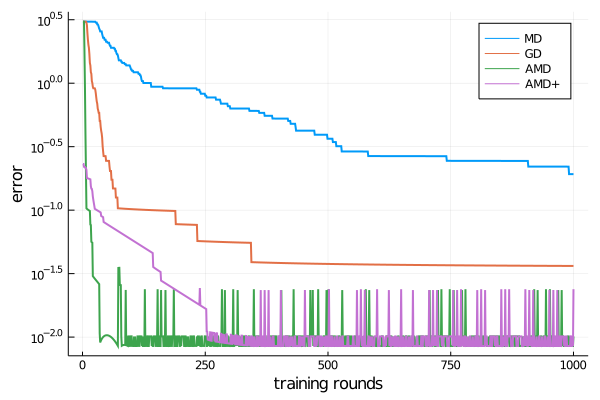

In [14]:
using Plots

x_opt = perceptron_compute_optval(data,labels,λ)

#==>
p1 = sqrt.(sum((x_out1 .- x_opt).^2, dims=1)');
p2 = sqrt.(sum((x_out2 .- x_opt).^2, dims=1)');
p3 = sqrt.(sum((x_out3 .- x_opt).^2, dims=1)');
p4 = sqrt.(sum((x_out4 .- x_opt).^2, dims=1)');
<==#


p1 = zeros(k); p2 = zeros(k); 
p3 = zeros(k); p4 = zeros(k); 

for i=1:k
    p1[i] = norm(∇f(x_out1[:,i]),2);
    p2[i] = norm(∇f(x_out2[:,i]),2);
    p3[i] = norm(∇f(x_out3[:,i]),2);
    p4[i] = norm(∇f(x_out4[:,i]),2);
end

plot(hcat(p1,p2,p3,p4),yaxis=:log, linewidth=2, 
label = ["MD" "GD" "AMD" "AMD+"], xlabel = "training rounds", ylabel = "error")

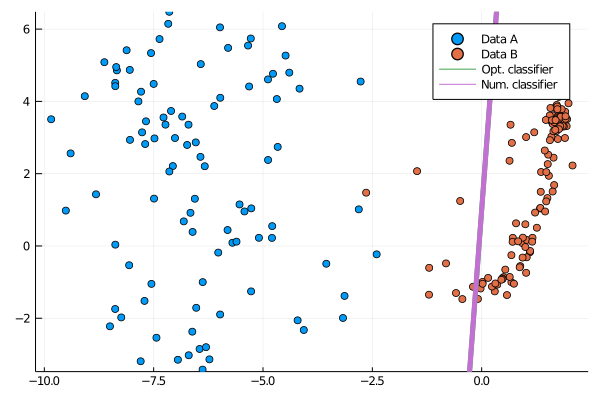

In [15]:
fig = svm_plot(data,labels,x_opt,x_out3)

In [6]:
error = sum(abs.(sign.(data*x_out3[:,end]) - sign.(labels)))/(2*size(data,1))

0.5080213903743316

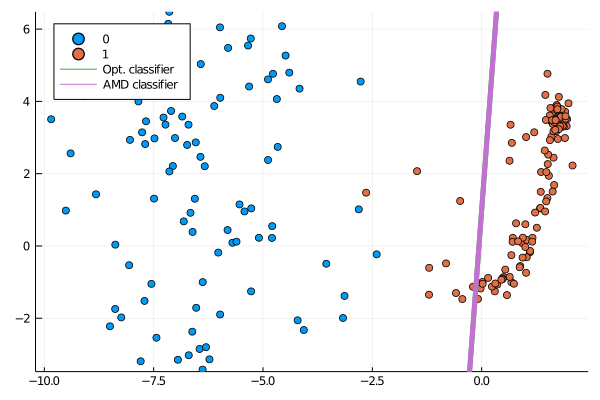

In [17]:
fig = plot(fig, legend=:topleft, label = ["0" "1" "Opt. classifier" "AMD classifier"])

In [22]:
savefig("perceptron.pdf")